# Prelude
# Acknowledgements 

# Code starts here

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.animation as animation
import cv2
import scipy as sp
from scipy.ndimage import maximum_filter
from scipy.ndimage import binary_erosion
from IPython.display import Image as display_image
from scipy.ndimage import rotate

image_repository  = "./Images/"

> ##### ${\tt get\_hist(filename)}$:

In [ ]:
def get_hist(filename):
    image = np.array(Image.open(image_repository + filename))

    # if image is not already grayscale, then it is converted to grayscale
    if len(image.shape) != 2:
        image = Image.open(image_repository + filename)
        image = np.array(image.convert('L'))

    num_bins = np.arange(0,256,1)

    fig, ax = plt.subplots(1,2, figsize = (15,3))
    ax[0].imshow(image, cmap = "gray")
    ax[0].set_title(filename)

    ax[1].hist(image.flatten(), bins = num_bins)
    ax[1].set_title("Histogram")
    ax[1].set_ylabel("Pixels")
    ax[1].set_xlabel("Gray Value")

    plt.tight_layout()
    plt.show()


> ##### ${\tt threshold(filename, lower\_lim, upper\_lim)}$:

In [ ]:
def threshold(filename, left_border, right_border):
    image = np.array(Image.open(image_repository + filename))

    if left_border > right_border:
        left_border, right_border = right_border, left_border
        print("NOTICE: border values have been swapped because left border is greater than right border")

    # if image is not already grayscale, then it is converted to grayscale
    if len(image.shape) != 2:
        image = Image.open(image_repository + filename)
        image = np.array(image.convert('L'))

    # Converting to binary through thresholding. The values to the left of the left border and to the right of the right boarder are set to 1.
    thresholded = np.zeros(image.shape)
    thresholded[image <= left_border] = 1
    thresholded[image >= right_border] = 1


    fig, ax = plt.subplots(1,2, figsize = (15,3))
    ax[0].imshow(image, cmap = "gray")
    ax[0].set_title(filename)

    ax[1].imshow(thresholded, cmap = "gray")
    ax[1].set_title("Values removed: "+ str(left_border) + " < Gray Value < " + str(right_border))

    plt.tight_layout()
    plt.show()


array([[[0.32997006, 0.36755738, 0.30247256],
        [0.32980123, 0.38600834, 0.28419042],
        [0.33091485, 0.38987574, 0.2792094 ],
        ...,
        [0.33586322, 0.33527072, 0.32886607],
        [0.33496586, 0.33429053, 0.3307436 ],
        [0.33504806, 0.33419936, 0.33075258]],

       [[0.33002917, 0.36109737, 0.30887346],
        [0.32988471, 0.37688442, 0.29323086],
        [0.33102697, 0.37510215, 0.29387088],
        ...,
        [0.33398049, 0.33482218, 0.33119732],
        [0.33302999, 0.33394003, 0.33302999],
        [0.33305355, 0.3338929 , 0.33305355]],

       [[0.32813751, 0.35811697, 0.31374551],
        [0.32678939, 0.37010159, 0.303109  ],
        [0.32990023, 0.37518895, 0.29491081],
        ...,
        [0.33317757, 0.33364486, 0.33317757],
        [0.33162706, 0.33143985, 0.33693309],
        [0.33167356, 0.33117066, 0.33715577]],

       ...,

       [[0.43936487, 0.32608695, 0.23454817],
        [0.4404677 , 0.32595094, 0.23358135],
        [0.43543547, 0

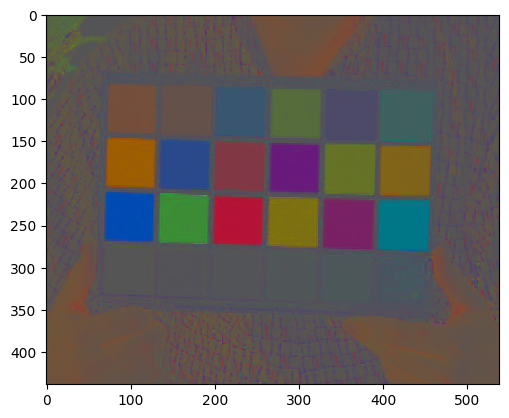

In [204]:
def convert_NCC(filename):
    image = np.array(Image.open(image_repository + filename))
    if len(image.shape) < 3:
        print("We don't accept binary/gray scale images here friend :).")
        return 

    image_rgb = np.zeros(image.shape)

    image_R = image[...,0]
    image_G = image[...,1]
    image_B = image[...,2]

    image_R = (image_R - np.min(image_R))/(np.max(image_R) - np.min(image_R))
    image_G = (image_G - np.min(image_G))/(np.max(image_G) - np.min(image_G))
    image_B = (image_B - np.min(image_B))/(np.max(image_B) - np.min(image_B))
    # Adding 1e-8 so there's no 1/0
    I = image_R + image_G + image_B + 1e-8

    image_r = image_R/I
    image_g = image_G/I
    image_b = image_B/I


    image_rgb[...,0] = image_r
    image_rgb[...,1] = image_g
    image_rgb[...,2] = image_b
    plt.imshow(image_rgb)
    return image_rgb
    

convert_NCC("Gretag-Macbeth_ColorChecker.jpg")

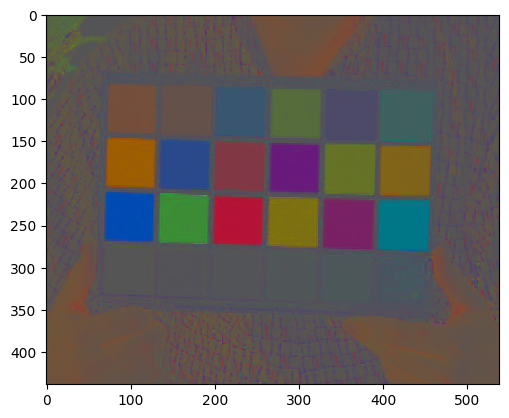

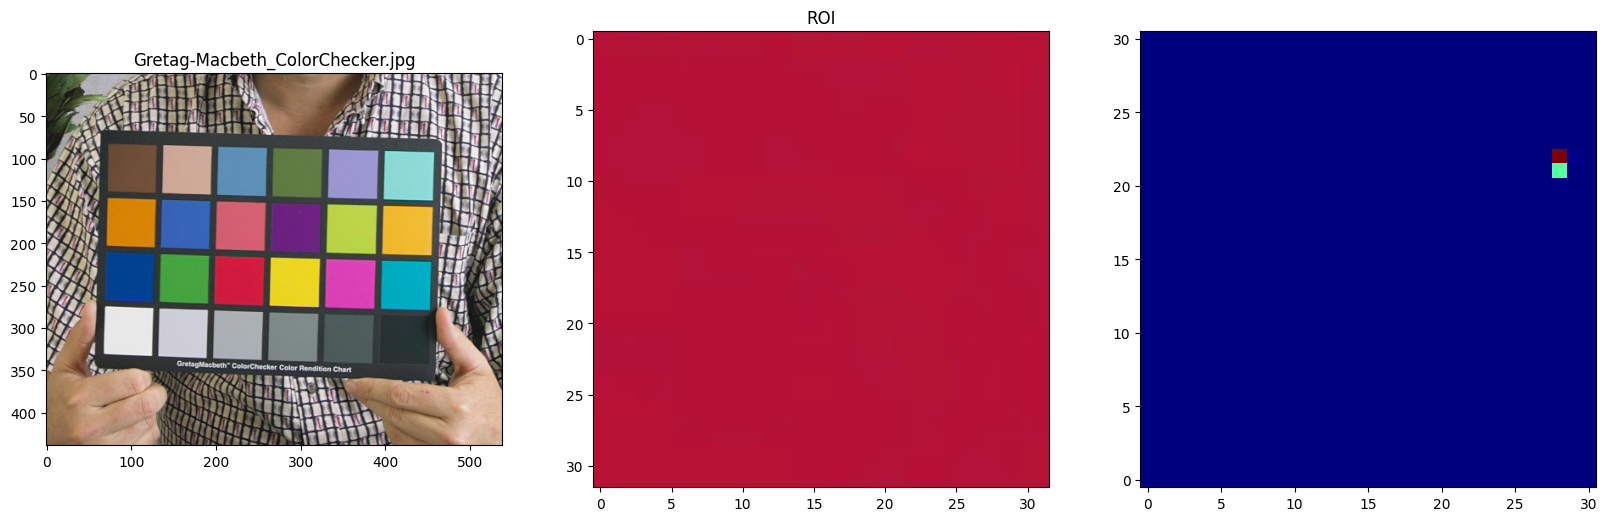

In [210]:
def rg_backprojection(filename, x, y, bins = 32):
    image = np.array(Image.open(image_repository + filename))

    if len(image.shape) < 3:
        print("We don't accept binary/gray scale images here friend :).")
        return 
    
    NCC = convert_NCC(filename)
    ROI = NCC[x:x+32, y:y+32]
    ROI_r = ROI[..., 0]
    ROI_g = ROI[..., 1]
    num_bins = np.linspace(0,1, bins)
    ROI_hist, x_edges, y_edges = np.histogram2d(ROI_g.flatten(), ROI_r.flatten(), bins = num_bins)
    ROI_hist_rotated = rotate(ROI_hist, -90)


    fig, ax = plt.subplots(1,3, figsize = (20, 10))
    ax[0].imshow(image)
    ax[0].set_title(filename)

    ax[1].imshow(ROI)
    ax[1].set_title("ROI")

    ax[2].imshow(ROI_hist_rotated, cmap = "jet")
    ax[2].invert_yaxis()
    plt.show()

rg_backprojection("Gretag-Macbeth_ColorChecker.jpg", 230, 210)




# Outputs here

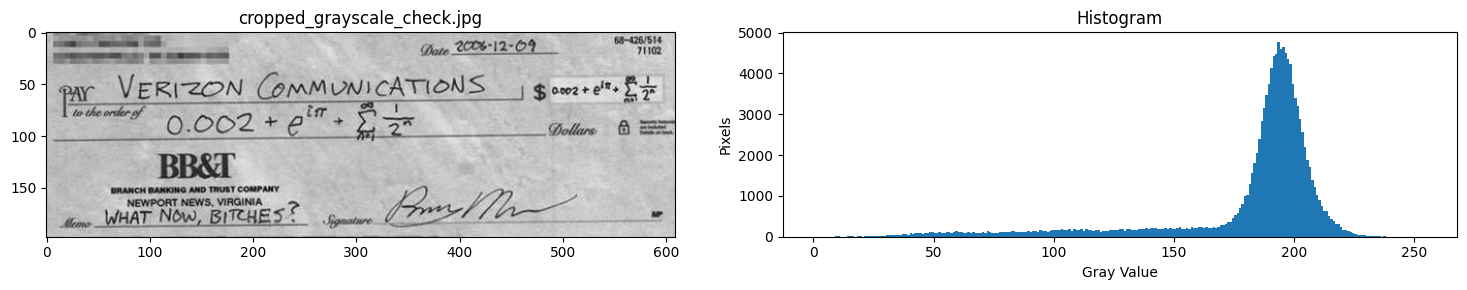

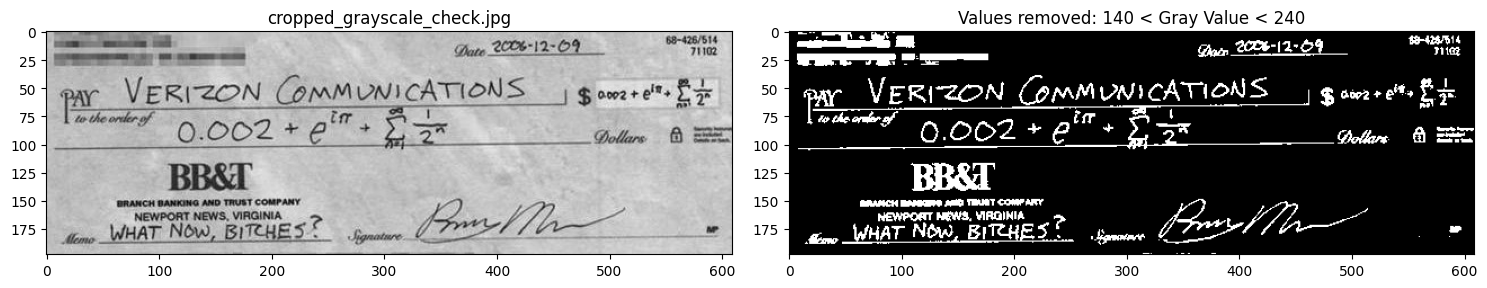

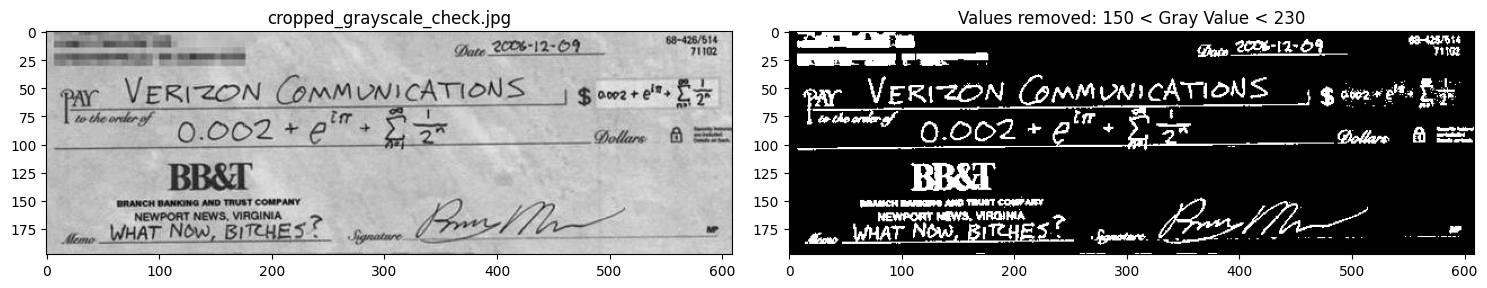

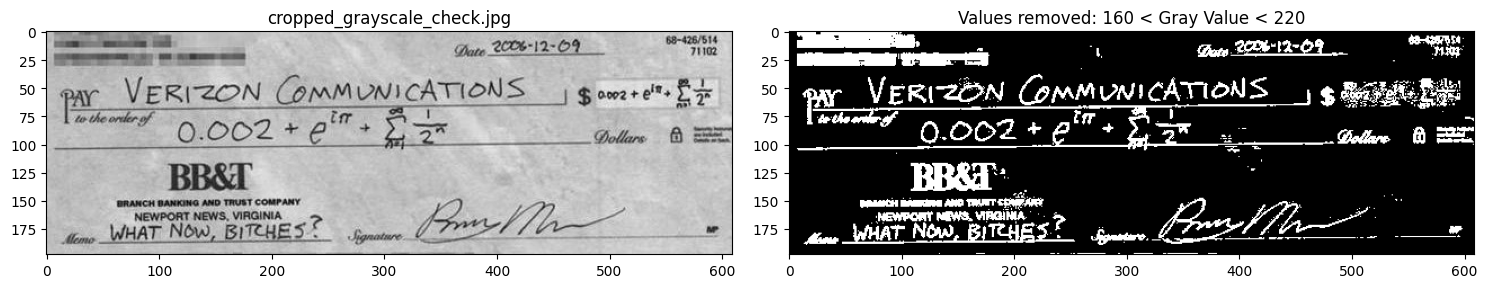

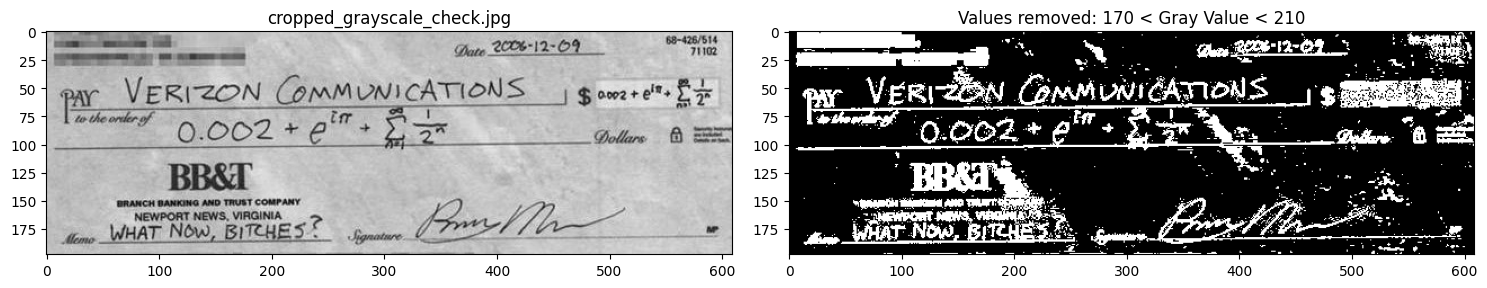

In [ ]:
get_hist("cropped_grayscale_check.jpg")
threshold("cropped_grayscale_check.jpg", 140, 240)
threshold("cropped_grayscale_check.jpg", 150, 230)
threshold("cropped_grayscale_check.jpg", 160, 220)
threshold("cropped_grayscale_check.jpg", 170, 210)